### Importando Bibliotecas Necessárias

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

### Carregando e Formatando o Dataset (Autism-Adult-Data.arff)

In [20]:
import pandas
import plotly.express as px
from scipy.io.arff import loadarff

file_path = "./Autism-Adult-Data.arff"

raw_data = loadarff(file_path)
df = pandas.DataFrame(raw_data[0])

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',...,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',...,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',...,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',...,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',...,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'


In [21]:
df = df.replace(b'1', 1)
df = df.replace(b'0', 0)
df = df.replace(b'm', "male")
df = df.replace(b'f', "female")
df = df.replace(b'no', 0)
df = df.replace(b'yes', 1)
df = df.replace(b'NO', 0)
df = df.replace(b'YES', 1)

df = df.replace(b'Self', "Self")
df = df.replace(b'Parent', "Parent")
df = df.replace(b'?', "?")
df = df.replace(b'Health care professional', "HealthCareProfessional")
df = df.replace(b'Relative', "Relative")
df = df.replace(b'Others', "Others")

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,female,b'White-European',0,0,b'United States',0,6.0,b'18 and more',Self,0
1,1,1,0,1,0,0,0,1,0,1,...,male,b'Latino',0,1,b'Brazil',0,5.0,b'18 and more',Self,0
2,1,1,0,1,1,0,1,1,1,1,...,male,b'Latino',1,1,b'Spain',0,8.0,b'18 and more',Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,female,b'White-European',0,1,b'United States',0,6.0,b'18 and more',Self,0
4,1,0,0,0,0,0,0,1,0,0,...,female,?,0,0,b'Egypt',0,2.0,b'18 and more',?,0


### Dividindo o Dataset em Teste (20%) e Treino (80%)

In [26]:
data = df.iloc[:, 1:10] 
target = df.iloc[:, -1].values
XTrain, XTest, YTrain, YTest = train_test_split(data, target, test_size=0.2)

     A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  A8_Score  \
0           1         1         1         0         0         1         1   
1           1         0         1         0         0         0         1   
2           1         0         1         1         0         1         1   
3           1         0         1         0         0         1         1   
4           0         0         0         0         0         0         1   
..        ...       ...       ...       ...       ...       ...       ...   
699         1         0         1         1         0         1         1   
700         0         0         0         0         0         0         1   
701         0         1         1         1         0         1         1   
702         0         0         1         1         0         1         0   
703         0         1         1         1         0         1         1   

     A9_Score  A10_Score  
0           0          0  
1           0        

### Treinamento e Previsões

In [27]:
# KNN
cls_knn = KNeighborsClassifier(n_neighbors=6)
cls_knn.fit(XTrain, YTrain)

# Regressão Logística
cls_rl = LogisticRegression(random_state = 0)
cls_rl.fit(XTrain, YTrain)

# Naive Bayes
cls_nb = GaussianNB()
cls_nb.fit(XTrain, YTrain)

GaussianNB()

In [28]:
# KNN
YPredKNN = cls_knn.predict(XTest)

# Regressão Logística
YPredRL = cls_rl.predict(XTest)

# Naive Bayes
YPredNB = cls_nb.predict(XTest)

### Avaliando o Algoritmo de KNN

<Axes: >

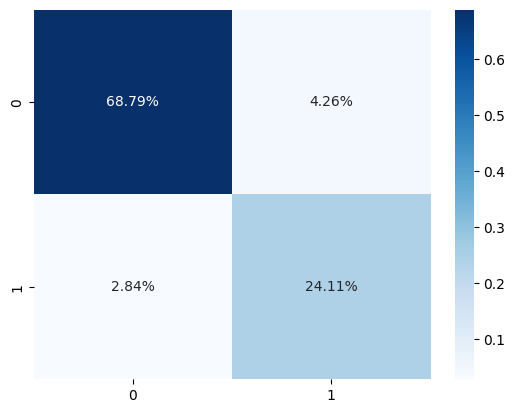

In [29]:
cf_matrixKNN = confusion_matrix(YTest, YPredKNN)
sns.heatmap(cf_matrixKNN/np.sum(cf_matrixKNN), annot=True, fmt='.2%', cmap='Blues')

<Axes: >

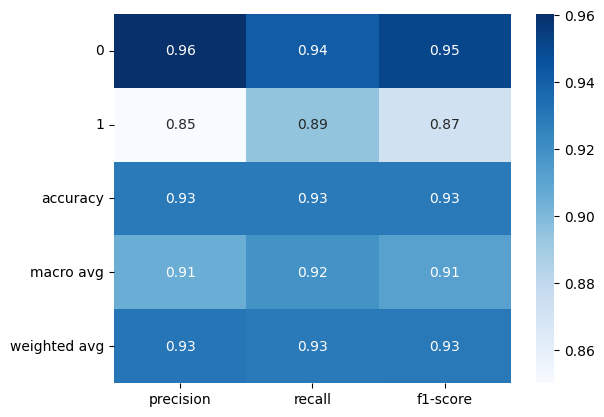

In [30]:
# RESULTADOS 1
clf_report1 = classification_report(YTest, YPredKNN, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report1).iloc[:-1, :].T, annot=True, cmap='Blues')

###Descobrindo os melhores parametros para o KNN

In [31]:
knn_range = list(range(1, 31))
param_grid_knn = dict(n_neighbors=knn_range)
print(param_grid_knn)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [32]:
grid_knn = GridSearchCV(cls_knn, param_grid_knn, cv=10, scoring='accuracy')
grid_knn.fit(XTrain, YTrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=6),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [33]:
pd.DataFrame(grid_knn.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.941447,0.019353,{'n_neighbors': 1}
1,0.941447,0.026333,{'n_neighbors': 2}
2,0.948496,0.034063,{'n_neighbors': 3}
3,0.941385,0.025212,{'n_neighbors': 4}
4,0.962751,0.022899,{'n_neighbors': 5}
5,0.950313,0.024870,{'n_neighbors': 6}
6,0.962751,0.020142,{'n_neighbors': 7}
7,0.957393,0.025447,{'n_neighbors': 8}
8,0.962688,0.016803,{'n_neighbors': 9}
9,0.960902,0.022335,{'n_neighbors': 10}


Best Score: 0.9697994987468672
Best Params: {'n_neighbors': 12}


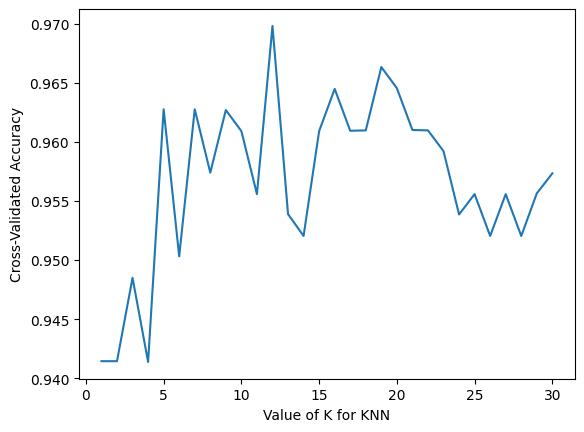

In [34]:
grid_mean_scores_knn = grid_knn.cv_results_['mean_test_score']
plt.plot(knn_range, grid_mean_scores_knn)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print("Best Score:", grid_knn.best_score_)
print("Best Params:", grid_knn.best_params_)

###Verificando a melhor performance do KNN com os novos parametros

In [37]:
cls_knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_["n_neighbors"])
cls_knn.fit(XTrain, YTrain)
YPredKNN = cls_knn.predict(XTest)
print(grid_knn.best_params_["n_neighbors"])

12


<Axes: >

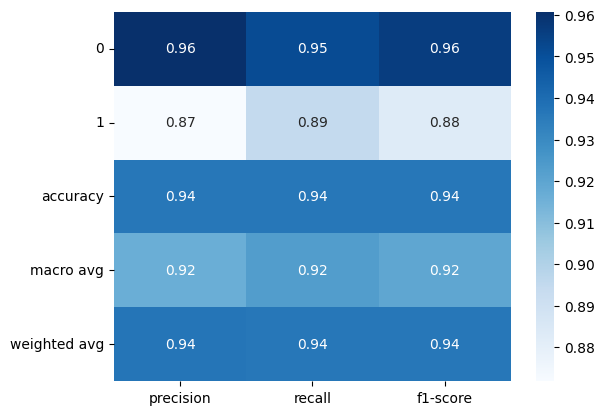

In [36]:
clf_report2 = classification_report(YTest, YPredKNN, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report2).iloc[:-1, :].T, annot=True, cmap='Blues')

<Axes: >

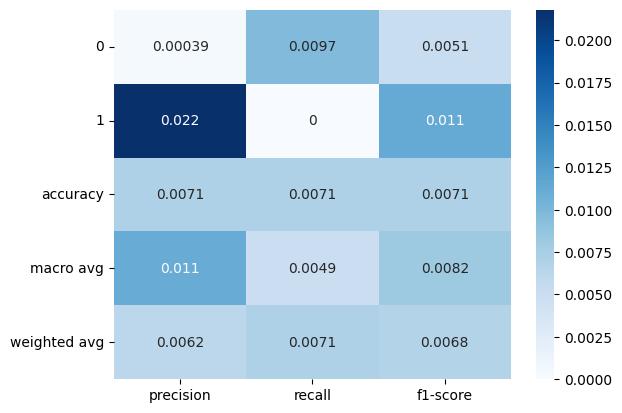

In [38]:
# RESULTADOS 2 - RESULTADOS 1
sns.heatmap(pd.DataFrame(clf_report2).iloc[:-1, :].T - pd.DataFrame(clf_report1).iloc[:-1, :].T, annot=True, cmap='Blues')

### Avaliando o Algoritmo de Regressão Logística

<Axes: >

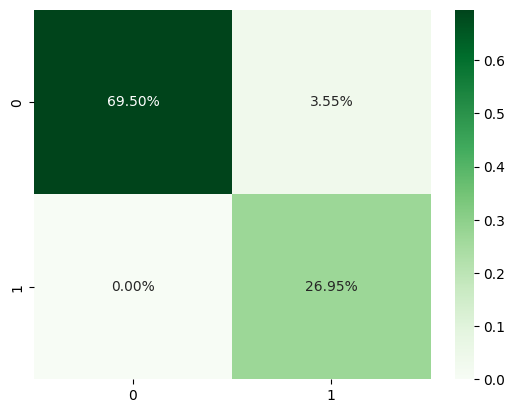

In [40]:
cf_matrixRL = confusion_matrix(YTest, YPredRL)
sns.heatmap(cf_matrixRL/np.sum(cf_matrixRL), annot=True, fmt='.2%', cmap='Greens')

<Axes: >

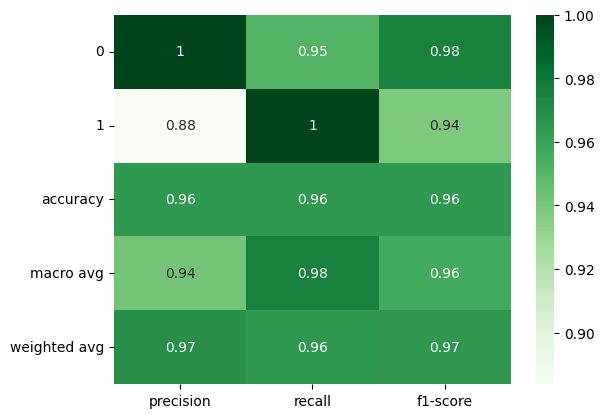

In [41]:
# RESULTADOS 1
clf_report1 = classification_report(YTest, YPredRL, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report1).iloc[:-1, :].T, annot=True, cmap='Greens')

In [42]:
param_grid_rl = [{'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20), 'solver' : ['liblinear']}]

grid_rl = GridSearchCV(cls_rl, param_grid_rl, cv = 10, scoring = 'accuracy')
grid_rl.fit(XTrain, YTrain)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             scoring='accuracy')

In [43]:
pd.DataFrame(grid_rl.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.731798,0.004560,"{'C': 0.0001, 'penalty': 'l1', 'solver': 'libl..."
1,0.731798,0.004560,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'libl..."
2,0.731798,0.004560,"{'C': 0.00026366508987303583, 'penalty': 'l1',..."
3,0.731798,0.004560,"{'C': 0.00026366508987303583, 'penalty': 'l2',..."
4,0.731798,0.004560,"{'C': 0.0006951927961775605, 'penalty': 'l1', ..."
5,0.731798,0.004560,"{'C': 0.0006951927961775605, 'penalty': 'l2', ..."
6,0.731798,0.004560,"{'C': 0.0018329807108324356, 'penalty': 'l1', ..."
7,0.731798,0.004560,"{'C': 0.0018329807108324356, 'penalty': 'l2', ..."
8,0.731798,0.004560,"{'C': 0.004832930238571752, 'penalty': 'l1', '..."
9,0.754793,0.024351,"{'C': 0.004832930238571752, 'penalty': 'l2', '..."


In [44]:
print("Best Score:", grid_rl.best_score_)
print("Best Params:", grid_rl.best_params_)

Best Score: 0.9750939849624061
Best Params: {'C': 1.623776739188721, 'penalty': 'l1', 'solver': 'liblinear'}


###Verificando a melhora da performance da Regressão Logística com os novos parametros

In [47]:
cls_rl = LogisticRegression(C=grid_rl.best_params_["C"], penalty=grid_rl.best_params_["penalty"], solver=grid_rl.best_params_["solver"])
cls_rl.fit(XTrain, YTrain)
YPredRL = cls_rl.predict(XTest)

<Axes: >

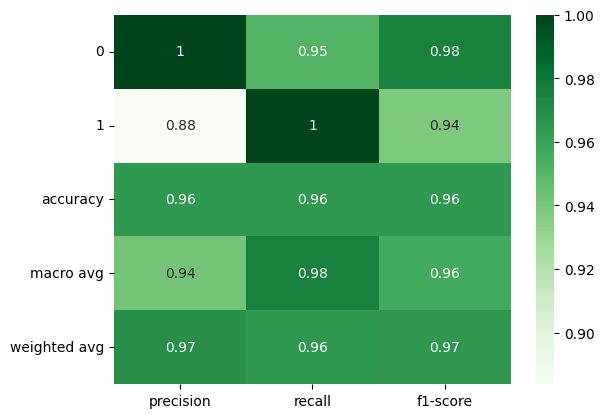

In [48]:
# RESULTADOS 2
clf_report2 = classification_report(YTest, YPredRL, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report2).iloc[:-1, :].T, annot=True, cmap='Greens')

<Axes: >

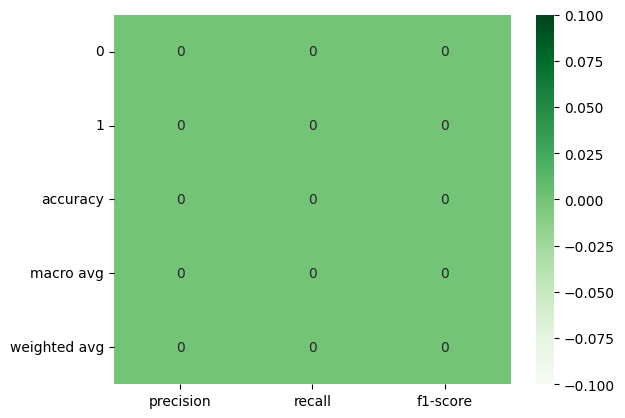

In [49]:
# RESULTADOS 2 - RESULTADOS 1
sns.heatmap(pd.DataFrame(clf_report2).iloc[:-1, :].T - pd.DataFrame(clf_report1).iloc[:-1, :].T, annot=True, cmap='Greens')

###Avaliando o Algoritmo de Naive Bayes

<Axes: >

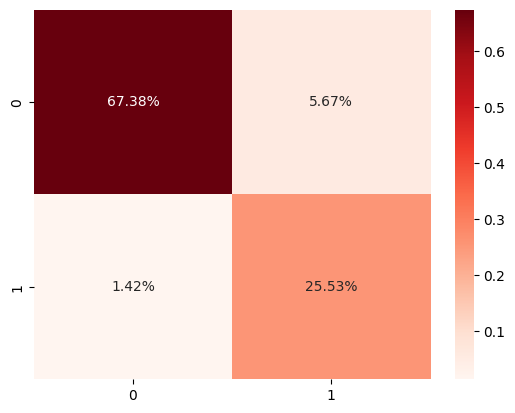

In [50]:
cf_matrixNB = confusion_matrix(YTest, YPredNB)
sns.heatmap(cf_matrixNB/np.sum(cf_matrixNB), annot=True, fmt='.2%', cmap='Reds')

<Axes: >

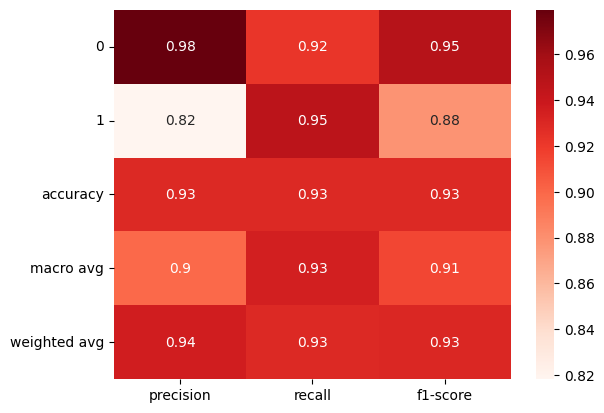

In [51]:
clf_report1 = classification_report(YTest, YPredNB, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report1).iloc[:-1, :].T, annot=True, cmap='Reds')

In [60]:
nb_range = np.linspace(0,5,101)
param_grid_nb = dict(var_smoothing=nb_range)
grid_nb = GridSearchCV(cls_nb, param_grid_nb, cv=10, scoring='accuracy') 
grid_nb.fit(XTrain, YTrain)

GridSearchCV(cv=10, estimator=GaussianNB(var_smoothing=0.023),
             param_grid={'var_smoothing': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  ])},
             scoring='accuracy')

In [61]:
pd.DataFrame(grid_nb.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.950313,0.038848,{'var_smoothing': 0.0}
1,0.953853,0.033980,{'var_smoothing': 0.05}
2,0.955608,0.034945,{'var_smoothing': 0.1}
3,0.955608,0.034945,{'var_smoothing': 0.15000000000000002}
4,0.955608,0.034945,{'var_smoothing': 0.2}
...,...,...,...
96,0.858020,0.038340,{'var_smoothing': 4.800000000000001}
97,0.854449,0.038255,{'var_smoothing': 4.8500000000000005}
98,0.854449,0.038255,{'var_smoothing': 4.9}
99,0.854449,0.038255,{'var_smoothing': 4.95}


Best Score: 0.955607769423559
Best Params: {'var_smoothing': 0.1}


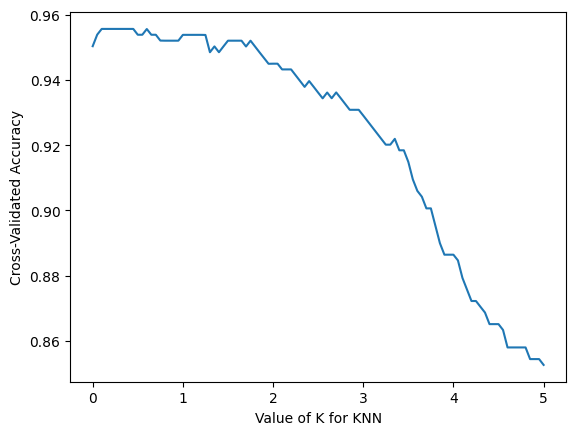

In [62]:
grid_mean_scores_nb = grid_nb.cv_results_['mean_test_score']
plt.plot(nb_range, grid_mean_scores_nb)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print("Best Score:", grid_nb.best_score_)
print("Best Params:", grid_nb.best_params_)

In [63]:
cls_nb = GaussianNB(var_smoothing=grid_nb.best_params_["var_smoothing"])
cls_nb.fit(XTrain, YTrain)
YPredNB = cls_nb.predict(XTest)

<Axes: >

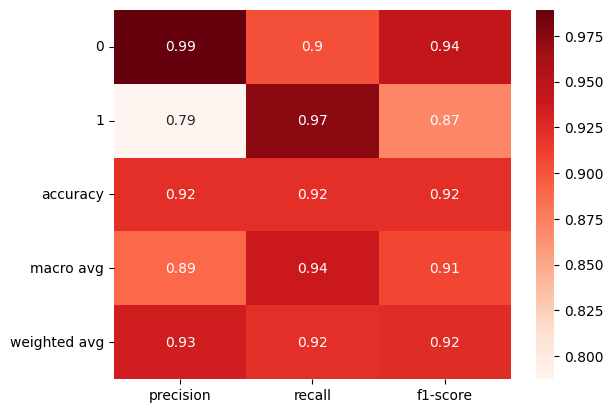

In [64]:
clf_report2 = classification_report(YTest, YPredNB, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report2).iloc[:-1, :].T, annot=True, cmap='Reds')

<Axes: >

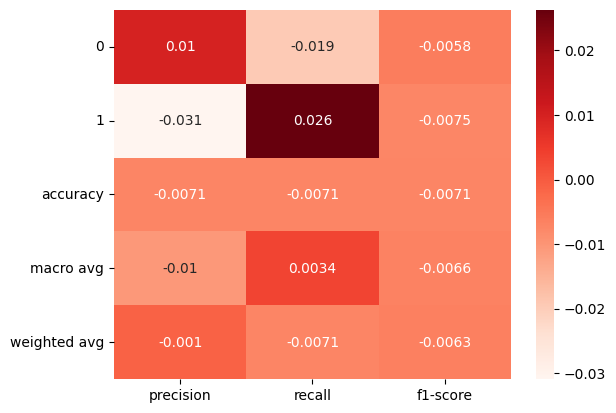

In [66]:
# RESULTADOS 2 - RESULTADOS 1
sns.heatmap(pd.DataFrame(clf_report2).iloc[:-1, :].T - pd.DataFrame(clf_report1).iloc[:-1, :].T, annot=True, cmap='Reds')